# FROM NOBELS TO STEM: Where did the women go?

The Nobel prizes were stablish with the funding Alfred Nobel left on his will and since its start in 1901, the Nobel prizes have become a largely recognisable prize in the fields of Chemistry, Physics, Physiology or Medicine, Peace, Literature and Economic Sciences (for extra information go to [the Nobel Prize webpage](https://www.nobelprize.org)). <br>
Many have won the prize and the glory that comes within, and these winners came from different countries, different backgrounds and are represented both by males and females, or is it?

Nonetheless, and although many years have passed (119 years to be more exact), the number of females (only 18 up to 2016) that have won a nobel prize is very low compared to the male winners (572)

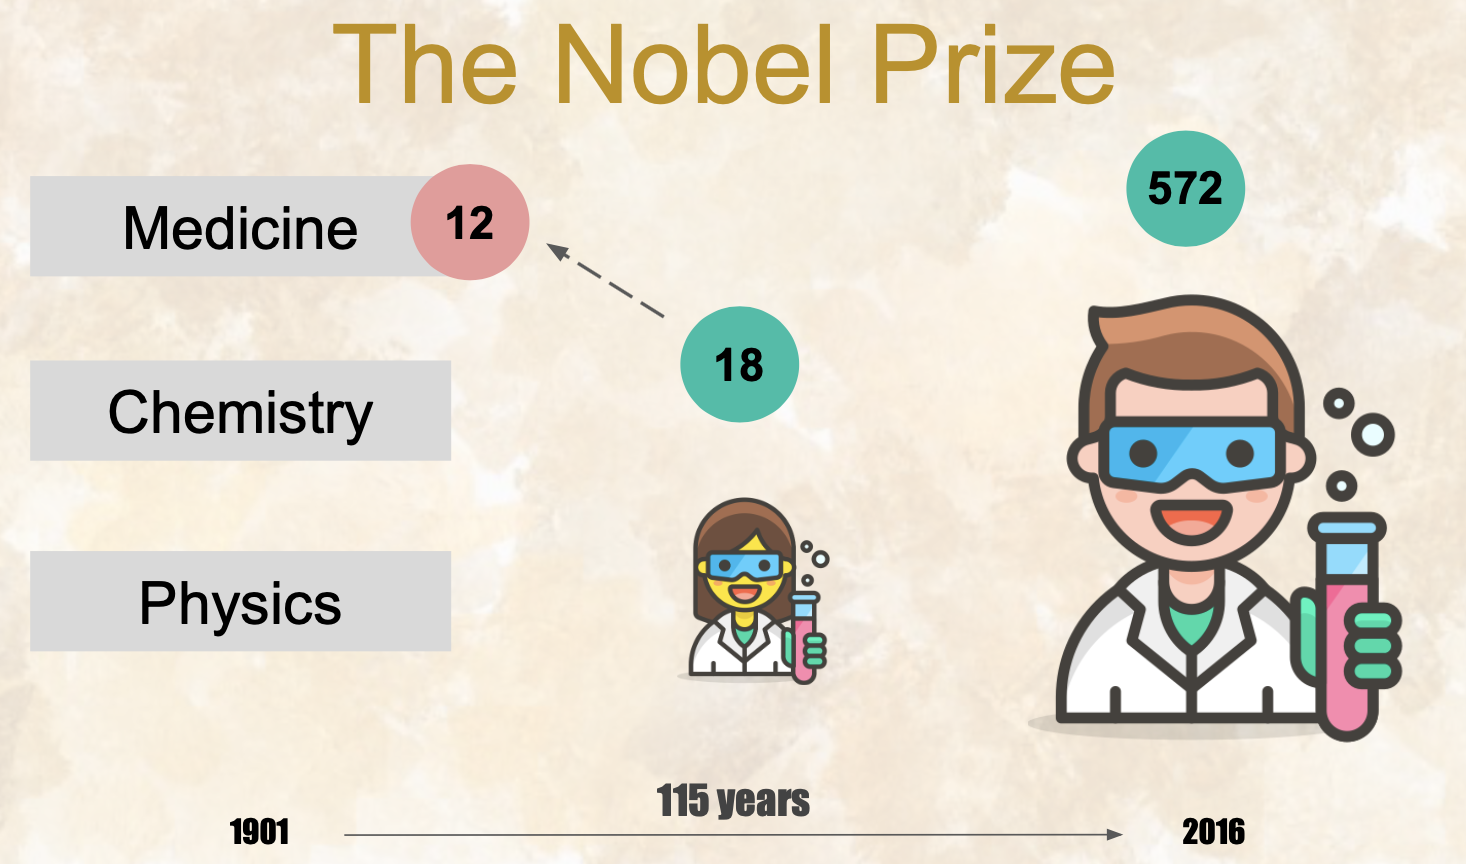

![nobel_prize]('nobel_prize.png')

In [ ]:
This massive difference arose various questions that will be individually explored:

## Question 1: Are there more males than females in the world? 

### Female/Male Ratio

The female vs male ratio (males per 100 females) shows how at the age of 15 there are more males than females and how the ratio becomes female favored as we grow older 

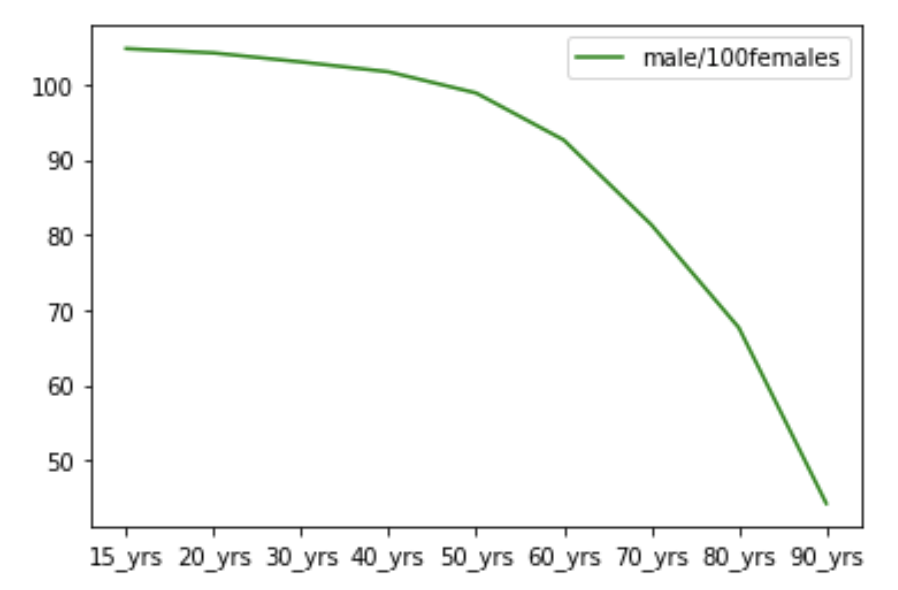

<img src="https://bit.ly/2VnXWr2" alt="Ironhack Logo" width="100"/>